# Logitsic regression and Softmax regression for document classification


Logistic regression 은 binary classification 에 널리 이용되는 방법입니다. 이에 대한 기하학적인 의미를 알아봅시다. 또한 클래스가 3개 이상일 경우의 일반화된 logistic resgression인 Softmax regression 으로 의미를 확장해 봅시다. Softmax regression 을 이해하면 Word2Vec 과 같은 word embedding, represetation learning 의 원리를 이해할 수 있습니다.  

### Geometric interpretation of logistic regression

Logistic regression은 머신러닝, 데이터마이닝 공부를 시작할 때 가장 먼저 만나는 classifier 입니다. Logistic은 (X,Y) 가 주어졌을 때, feature X 와 Y와의 관계를 학습합니다. 특히 y가 positive/negative와 같이 두 개의 클래스로 이뤄져 있을 때 이용하는 방법입니다.  Logistic regression 은 하나의 row 혹은 벡터 공간의 하나의 점 x가 주어졌을 때,클래스가 y일 확률을 학습한다고 이야기합니다.  
exponential 의 범위는 (0,+∞) 이기 때문에 1/1+exp(−θTx)는 (0,1)의 범위를 지닙니다. 그래서 확률로 해석을 할 수 있습니다.  

yθ(x) = 1/1+exp(−θTx) 위 식을 조금 더 자세하게 풀어보면 positive,negative 이기 때문에 모든 경우에 대하여 exp(−θTx) 의 값을 더하여, 이 값으로 각각의 exp(−θTx)를 나눠주면 확률 형식이 됩니다,  


![1](datasets/img/20191004_225844.png)

// 질문 여기서 각세타의 의미??
같을지는 모르겠지만 : direction vector of separating hyperplane


혹은 logistic regression 을 기하학적으로 해석하기도 합니다 Bias 를 포함한 logistic regression 의 단면 (hyperplane)은 빨간색과 파란색의 점들을 구분하는 결정 단면 (separating hyperplane) 입니다, 쉽게 말해 경계면을 학습하는 것입니다. 이 결정단면의 수식은  (θTx)입니다. 즉, 단면 위에 있는점은 postive, negative 클래스에 속할 확률이 각각 0.5라는 의미입니다. 어느 쪽에 속하는지 확신할 수 없으니까요.


 ![2](https://lovit.github.io/assets/figures/logistic_separate_plane.png)
 
 그럼 위에서 pos,neg의 확률을 각각 계산하는 형식으로 logistic regression을 표현할 때도 기하학적으로 해석해 봅시다 , 각각의 세타는 일종의 클래스의 대표벡터가 됩니다. 세타1은 파란색 점들을 대표하는 벡터, 세타2는 빨간색 점들을 대표하는 벡터입니다. 하나의 클래스 당 하나의 대표벡터를 가집니다. (단 하나의 대표벡터를 지니기 떄문에 linear inseparable case 가 생깁니다.이는 Feed-foward neural network 에서 이야기 하겠습니다). Logistic regression 은 각 점이 각 클래스의 대표벡터에 얼마나 가까운지를 학습하는 것입니다.
 
 ![3](https://lovit.github.io/assets/figures/logistic_direction_vector.png)
 

### Meaning of coefficients in document classification

세타 는 logistic regression의 coefficient vector 입니다. θ_kj 는 feature j가 클래스의 k의 기여도로 해석하기도 합니다. 우리는 뉴스 문서집합에서 '연예뉴스' 와 그 외 뉴스를 구분하는 문서판별기를 logistic regression 으로 학습합니다. 
Coefficient sms '연예뉴스' 클래스에 대하여 각 단어(feature)가 얼마나 기여를 하는지를 나타냅니다.  
'보였다, 이었다' 와 같은 단어는 어느캘래스에서도 등장하는 문법 기능의 단어들입니다. 좋은 판별기라면 이런 단어들은 무시될 것입니다.'외교,정책,무역'과 같은 단어는 연예뉴스보다 치,오교,경제 뉴스에 더 어울릴 것입니다. 이런 단어들이 등장한다면 연예뉴스가 아니라는 힌트를 얻게 됩니다. 하지만 '무대, 공연, 가수' 와 같은 단어들이 등장한다면 연예뉴스라는 힌트를 얻게 됩니다. Bag of words model (term frequent vecotr) 로 표현된 x는 coefficient vector 와 내적이 되기 떄문에 각 단어가 등장한 횟수만큼 coefficient 가 더해집니다. 그리고 exponential 을 통하여 (−∞,+∞) 인 값 (0,+∞) 로 변환됩니다.  

![4](https://lovit.github.io/assets/figures/logistic_coefficient_and_tf.png)

각 클래스에서 유독 자주 등장하는 단어들이 큰 coefficient 를 지닐 것이고, 이런 단어들이 등장하면 해당 클래스으 문서라고 판단합니다.

##### 짤막 용어 정리

coefficient vector :  
![feedfoward](datasets/img/20191005_141110.png)

coefficient : 계수,(물질의 특정한 속성을 나타내는 수)  


exponential : 지수 함수   
Voronoi diagram :  보로노이 다이어그램은 평면을 특정 점까지의 거리가 가장 가까운 점의 집합으로 분할한 그림이다. 들로네 삼각분할과 쌍대관계이다. 조지 보로노이의 이름에서 따왔다. 보로노이 다이어그램을 그리는 방법은 먼저, 평면에 있는 점들 중 가장 가까운 점 2개를 모두 연결한다.

### Softmax regression

여기까지 정리가 되었다면 softmax regression 은 한가지만 더 생각하면 됩니다. 클래스가 2개가 아닌 n개라면, 총 n개의 대표벡터를 학습하는 것입니다. 각 클래스를 구분하는 결정단면은 대표벡터의 Voronoi diagram과 같습니다, 단!, 각 대표벡터에 얼마나 가까운지는 벡터 간의 내적 (inner product)로 정의됩니다. 한마디로 x에 대하여 내적이 가장 큰 대표벡터의 클래스로 y를 판단하는 것입니다.  
마치 1-NN classfier 처럼 말이니다
![6](datasets/img/20191005_134331.png) 

우리는 인공데이터를 만들어서 softmax regression의 특징을 좀더 살펴보겠습니다. 데이터 생성 팔인은 https://lovit.github.io/assets/resources/logistic_data_generator.py 에서 받을수 있습니다.  
총 5개의 클래스에 대하여 각 클래스별로 100개의 2차원 데이터를 만들었습니다.  
방사형으로 퍼진 형태입니다. X는 데이터 Y는 각 데이터의 클래스입니다.

In [19]:
import numpy as np
from sklearn.preprocessing import normalize
from sklearn.metrics import pairwise_distances

def generate_spherical(n_class=5, n_per_class=100,
    dimension=2, minimum_cosine_distance=0.1,
    direction_perturbation_factor=0.2,
    radius_perturbation_factor=2):
    
    for _n_try in range(100):
        # class vector
        cv = np.random.random_sample((n_class, dimension))
        cv -= 0.5
        # check pairwise distance of class vectors
        dist = pairwise_distances(cv, metric='cosine')
        dist.sort()
        min_dist = dist[:,1].min()
        if min_dist > minimum_cosine_distance:
            break
        if _n_try >= 99:
            raise ValueError("""Failed to dispersed direction vector generation.""")
    cv = normalize(cv)
    
    X = np.zeros((n_class * n_per_class, dimension))
    Y = np.zeros(n_class * n_per_class)
    for c in range(n_class):
        Y[c * n_per_class:(c+1) * n_per_class] = c
        norm = np.sqrt(sum(cv[c] **2 ))
        for i in range(n_per_class):
            # row idx
            idx = c * n_per_class + i
            # direction pertubation
            dp = np.random.random_sample(dimension) - 0.5
            dp = normalize(dp.reshape(1,-1)) * norm * direction_perturbation_factor * np.random.random()
            # radius (magnitude) pertubation
            v = cv[c] + dp
            v *= (1 + radius_perturbation_factor * np.random.random())
            X[idx] = v

    return X, Y


In [20]:
X, Y = generate_spherical(n_class=5, n_per_class=100, dimension=2)

In [21]:
print(X,Y)

[[-1.4167309  -0.37086136]
 [-2.67793415 -0.45482794]
 [-2.48770675 -0.58151191]
 [-2.30804586 -0.75658489]
 [-2.3967798  -0.90201127]
 [-1.37505071 -0.33842663]
 [-1.8540813  -0.12048826]
 [-2.11238192 -0.46902371]
 [-1.70410519 -0.37136516]
 [-1.95654018 -0.76555097]
 [-2.15800574 -0.44447875]
 [-2.11044048 -0.14803989]
 [-2.60149337 -0.25522271]
 [-2.2623017  -0.68010601]
 [-1.8979323  -0.47855364]
 [-2.80969998 -0.66908301]
 [-2.36637874 -0.46634588]
 [-1.14817795 -0.41114713]
 [-3.20410271 -0.40011457]
 [-1.72034723 -0.35345777]
 [-1.71959616 -0.21700887]
 [-1.97927608 -0.27382208]
 [-1.1661788  -0.26339482]
 [-2.37050604 -0.48270175]
 [-2.34868586 -0.5634116 ]
 [-2.49391303 -0.25096462]
 [-1.43269771 -0.37882763]
 [-3.03596404 -0.62143048]
 [-2.75401922 -0.33646189]
 [-2.13817192 -0.79263763]
 [-2.35736373 -0.82366794]
 [-2.03228188 -0.19258875]
 [-1.16703175 -0.35858749]
 [-1.03778485 -0.36939357]
 [-1.66063207 -0.41095749]
 [-2.40227876 -0.30752407]
 [-1.49570025 -0.16980601]
 

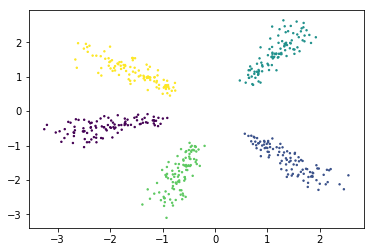

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,1], s=2, c=Y)
plt.show()

Scikit-learn 에서 logistic / softmax regression 은 모두 sklearn.linear_model.LogisticRegression 에 구현되어 있습니다. Y 의 값의 종류가 3 개 이상이면 softmax regression 을 학습힙니다.

In [23]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()
logistic.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Coefficients 는 LogisticRegression.coef_ 에 저장되어 있습니다. 앞선 설명대로라면 coefficient 는 각 클래스의 대표벡터여야 합니다. 5 개의 클래스에 대한 2차원 방향벡터가 학습됩니다. coef 의 row 는 클래스의 대표벡터입니다.

In [24]:
coef = logistic.coef_
print(coef.shape)

(5, 2)


이를 위 데이터 sacatter plot에 함께 겹처 그리니다. 대표벡터는 star marker를 이용합니다.  

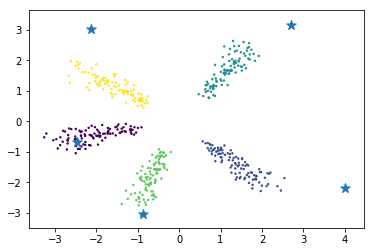

In [25]:
plt.scatter(X[:,0], X[:,1], s=2, c=Y)
plt.scatter(coef[:,0], coef[:,1], s=100, marker='*')
plt.show()

각 클래스의 데이터가 서로다른 방향으로 골고루 펼쳐져 있기 떄문에 클래스의 대표벡터들이 각 클래스의 분포와 비스사게 잘 퍼져있습니다. 하지만 데이터가 아래의 그림처럼 전체 공간의 한쪽에만 몰려 있다면, 방향벡터가 각 클래스의 데이터와 같은 방향인 것은 아닙니다. 데이터 분포의 경계에 있는 두 캘래스의 대표벡터는 빈 공간에 위치합니다. 이는 softmax regression에 데이터가 입력될 때 대표벡터와의 내적의 상대적인 크기가 더 중요하기 떄문입니다. 대표벡터들은 널리퍼져있어야 (서로 다른 방향 벡트를 가져야) 각 클래스에 속할 확률이 확연히 다르게 나타나기 때문이 이처럼 학습됩니다.  

![7](https://lovit.github.io/assets/figures/logistic_5class_oneside_data_w_classvector.png)